# Dependencies


In [ ]:
!pip install yfinance
!pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 2.6 MB/s eta 0:00:00


In [ ]:
import yfinance as yf
from datetime import date
import numpy as np
import pandas as pd
from hmmlearn import hmm
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 12]
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px


# Data Gathering


In [ ]:
input=pd.read_csv('input.csv')
input.replace(np.nan, 0, inplace=True)
input.head()

,time,open,high,low,close,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Plot,...,Regular Bullish Label,Regular Bearish,Regular Bearish Label,MOM,%K,%D,%R,Plot.1,ATR,ADX
0,2018-06-17,1.15861,1.16242,1.15652,1.16222,21.861980,55.572975,0.0,0.0,50,...,0.0,0.0,0.0,-0.02052,57.281800,34.074144,-48.748510,0.000985,0.007145,90.755949
1,2018-06-18,1.16222,1.16444,1.15305,1.15876,47.139376,58.760432,0.0,0.0,50,...,0.0,0.0,0.0,0.00558,72.205299,64.743550,-19.490781,0.001805,0.008645,94.609828
2,2018-06-19,1.15876,1.15999,1.15361,1.15699,29.096402,56.162665,0.0,0.0,50,...,0.0,0.0,0.0,0.00015,42.361721,57.283510,-49.868306,0.001730,0.008885,96.536768
3,2018-06-20,1.15699,1.16335,1.15079,1.16025,20.908477,52.397652,0.0,0.0,50,...,0.0,0.0,0.0,-0.00523,54.955109,48.658415,-50.636943,0.000885,0.009470,66.821827
4,2018-06-21,1.16025,1.16749,1.15980,1.16551,61.164815,53.275501,0.0,0.0,50,...,0.0,0.0,0.0,0.00149,81.731092,68.343101,-43.353293,0.001630,0.010125,71.691790


In [ ]:
input.tail()

,time,open,high,low,close,RSI,RSI-based MA,Upper Bollinger Band,Lower Bollinger Band,Plot,...,Regular Bullish Label,Regular Bearish,Regular Bearish Label,MOM,%K,%D,%R,Plot.1,ATR,ADX
1453,2024-01-18,1.08761,1.08975,1.08657,1.08971,14.079549,31.985984,0.0,0.0,50,...,0.0,0.0,0.0,0.00010,67.454724,55.328106,-50.915141,0.000310,0.004595,25.868029
1454,2024-01-21,1.08894,1.09094,1.08799,1.08825,54.061635,33.596566,0.0,0.0,50,...,0.0,0.0,0.0,0.00071,61.235279,64.345001,-45.766590,0.000665,0.003065,35.259259
1455,2024-01-22,1.08825,1.09162,1.08215,1.08533,36.458360,35.861763,0.0,0.0,50,...,0.0,0.0,0.0,0.00064,36.011831,48.623555,-35.586061,0.000345,0.006210,55.095072
1456,2024-01-23,1.08533,1.09323,1.08441,1.08846,9.706882,36.295914,0.0,0.0,50,...,0.0,0.0,0.0,-0.00361,45.264592,40.638211,-71.299639,0.001460,0.009145,37.627673
1457,2024-01-24,1.08846,1.08996,1.08702,1.08953,64.908118,38.060626,0.0,0.0,50,...,0.0,0.0,0.0,0.00021,57.499673,51.382132,-54.081633,0.001565,0.005880,28.893974


In [ ]:
##df['Log'] = np.log(df['Close'])
##df['Returns'] = df['Log'].pct_change()
##df['Range'] = (df['High'] - df['Low'])
data_raw = input[['RSI', 'MOM', '%K', '%D', '%R', 'Plot.1', 'ATR', 'ADX']]

scaler = MinMaxScaler()
data = pd.DataFrame(scaler.fit_transform(data_raw), columns=data_raw.columns)

data.head()

,RSI,MOM,%K,%D,%R,Plot.1,ATR,ADX
0,0.216157,0.158554,0.577254,0.345497,0.521134,0.090326,0.183849,0.894581
1,0.470016,0.572380,0.732647,0.682879,0.818632,0.165520,0.241123,0.938854
2,0.288812,0.486285,0.421895,0.600814,0.509748,0.158643,0.250286,0.960990
3,0.206581,0.400983,0.553026,0.505933,0.501932,0.081155,0.272623,0.619635
4,0.610873,0.507531,0.831837,0.722476,0.575994,0.149473,0.297633,0.675579


# Model Fitting

In [ ]:
model = hmm.GaussianHMM(n_components=2 ,random_state=1000 , algorithm='viterbi', covariance_type="full", n_iter=1000)
model.fit(data)

GaussianHMM(covariance_type='full', n_components=2, n_iter=1000,
            random_state=1000)

In [ ]:
model.score(data)

7710.647657982859

In [ ]:
states = model.predict(data)

<Axes: >

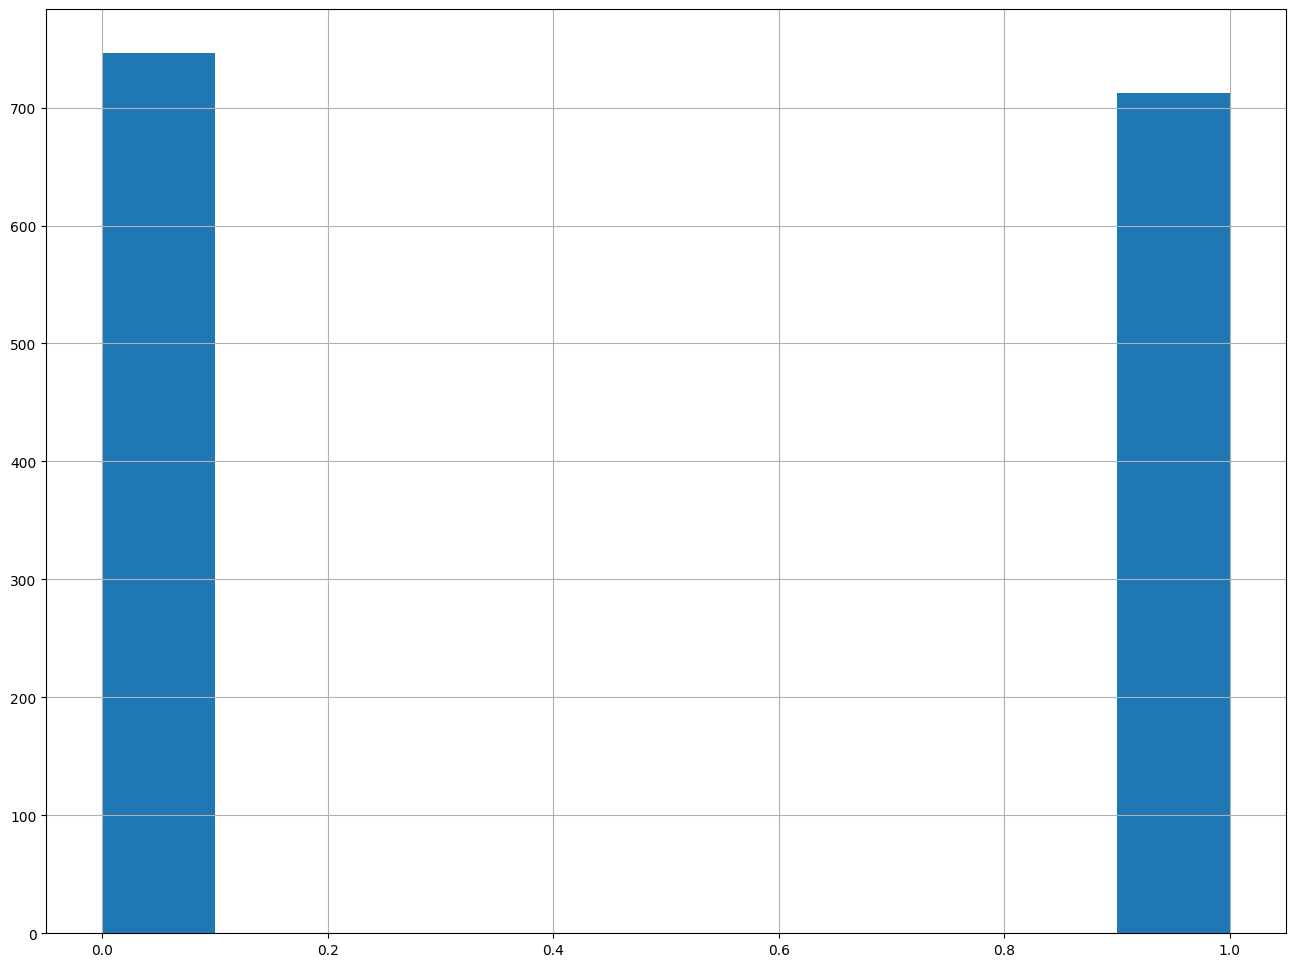

In [ ]:
pd.Series(states).hist()

# Visuals

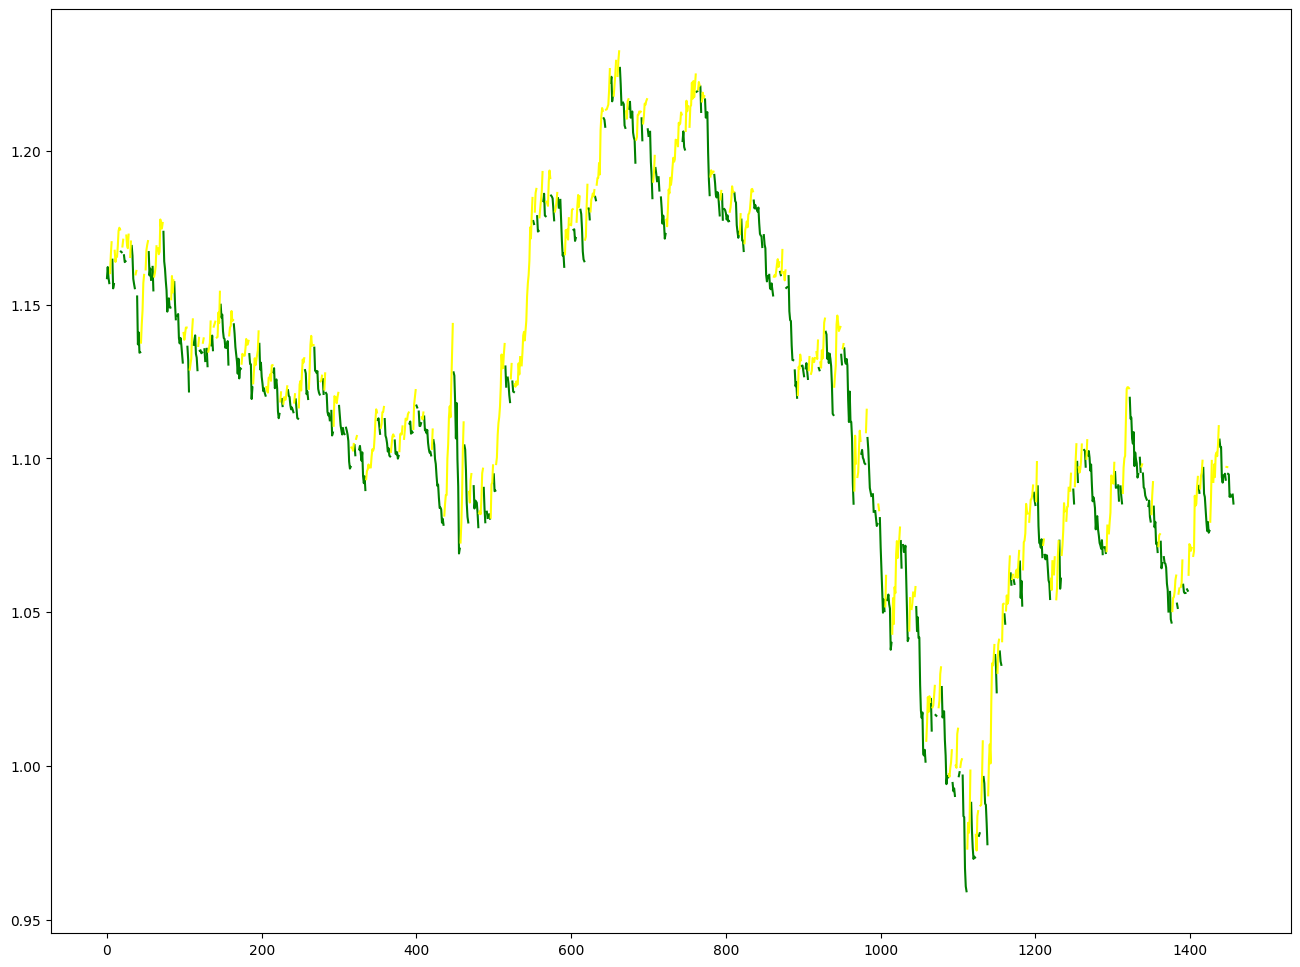

In [ ]:
state1,state2,state3,state4 = [],[],[],[]
i = 0
for state in states:
  if state == 0:
    state1.append(input['open'][i])
    state2.append(float('nan'))
    state3.append(float('nan'))
  if state == 1:
    state2.append(input['open'][i])
    state1.append(float('nan'))
    state3.append(float('nan'))
  if state == 2:
    state3.append(input['open'][i])
    state2.append(float('nan'))
    state1.append(float('nan'))
  i += 1
plt.plot(state1,color='green')
plt.plot(state2,color='yellow')
plt.plot(state3,color='red')

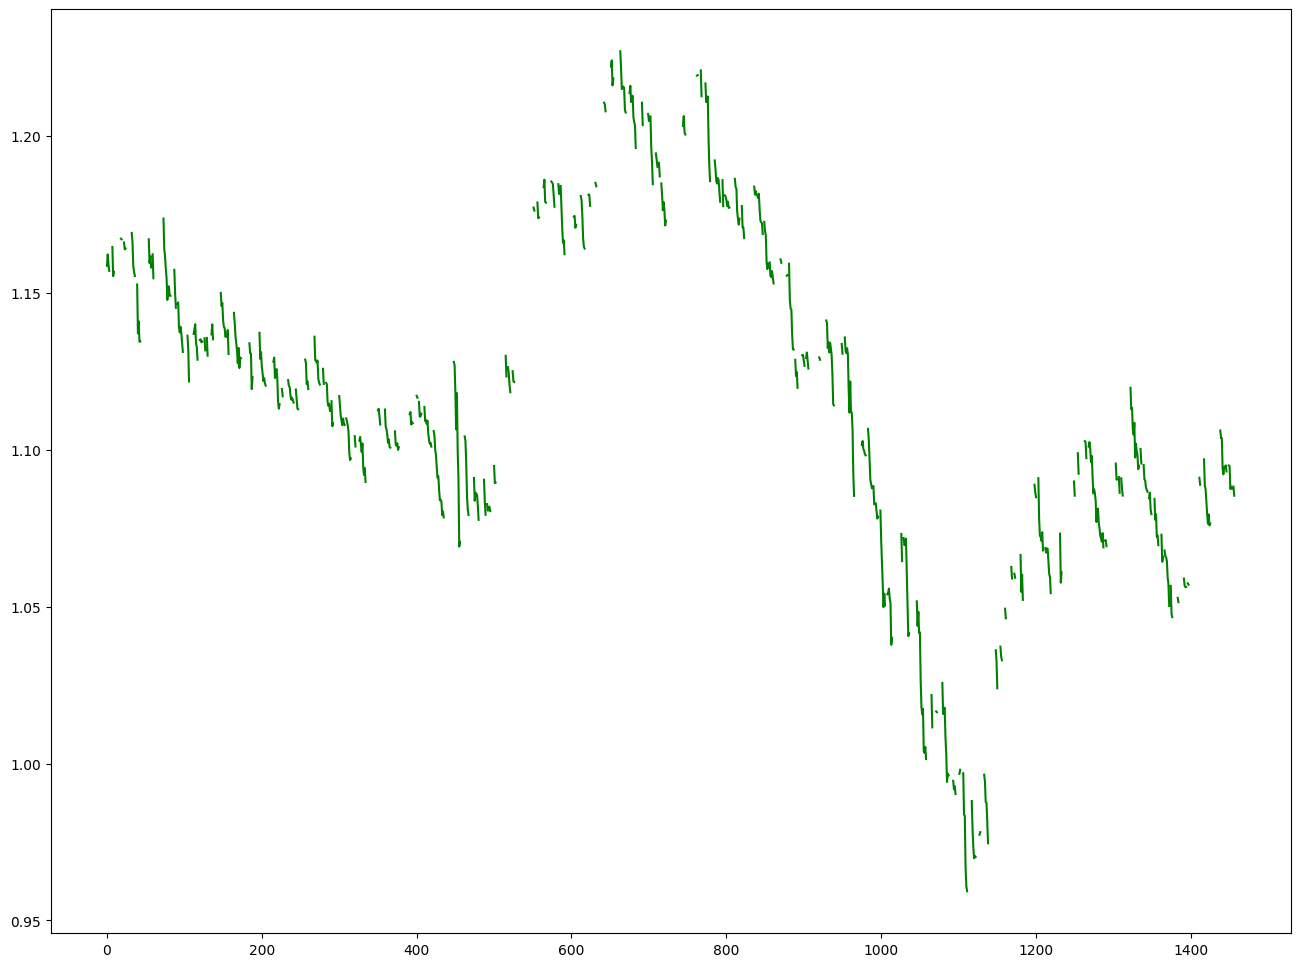

In [ ]:
plt.plot(state1,color='green')